In [164]:
from census import Census

import gmaps
import numpy as np
import pandas as pd
import requests
import time
from scipy.stats import linregress
from matplotlib import pyplot as plt

In [165]:
artist_df = pd.read_csv('data.csv')
artist_df

,acousticness,artists,danceability,duration_ms,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.991000,['Mamie Smith'],0.598,168333,0.224,0,0cS0A1fUEUd1EW3FcF8AEI,0.000522,5,0.3790,-12.628,0,Keep A Song In Your Soul,12,1920,0.0936,149.976,0.6340,1920
1,0.643000,"[""Screamin' Jay Hawkins""]",0.852,150200,0.517,0,0hbkKFIJm7Z05H8Zl9w30f,0.026400,5,0.0809,-7.261,0,I Put A Spell On You,7,1920-01-05,0.0534,86.889,0.9500,1920
2,0.993000,['Mamie Smith'],0.647,163827,0.186,0,11m7laMUgmOKqI3oYzuhne,0.000018,0,0.5190,-12.098,1,Golfing Papa,4,1920,0.1740,97.600,0.6890,1920
3,0.000173,['Oscar Velazquez'],0.730,422087,0.798,0,19Lc5SfJJ5O1oaxY0fpwfh,0.801000,2,0.1280,-7.311,1,True House Music - Xavier Santos & Carlos Gomi...,17,1920-01-01,0.0425,127.997,0.0422,1920
4,0.295000,['Mixe'],0.704,165224,0.707,1,2hJjbsLCytGsnAHfdsLejp,0.000246,10,0.4020,-6.036,0,Xuniverxe,2,1920-10-01,0.0768,122.076,0.2990,1920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174384,0.009170,"['DJ Combo', 'Sander-7', 'Tony T']",0.792,147615,0.866,0,46LhBf6TvYjZU2SMvGZAbn,0.000060,6,0.1780,-5.089,0,The One,0,2020-12-25,0.0356,125.972,0.1860,2020
174385,0.795000,['Alessia Cara'],0.429,144720,0.211,0,7tue2Wemjd0FZzRtDrQFZd,0.000000,4,0.1960,-11.665,1,A Little More,0,2021-01-22,0.0360,94.710,0.2280,2021
174386,0.806000,['Roger Fly'],0.671,218147,0.589,0,48Qj61hOdYmUCFJbpQ29Ob,0.920000,4,0.1130,-12.393,0,Together,0,2020-12-09,0.0282,108.058,0.7140,2020
174387,0.920000,['Taylor Swift'],0.462,244000,0.240,1,1gcyHQpBQ1lfXGdhZmWrHP,0.000000,0,0.1130,-12.077,1,champagne problems,69,2021-01-07,0.0377,171.319,0.3200,2021


In [166]:
year_df = artist_df.loc[(artist_df['year'] == 2021) | (artist_df['year'] == 2020) | (artist_df['year'] == 2019) | (artist_df['year'] == 2018)]

In [167]:
grouped_df = year_df.groupby(['year'])['id'].count()

In [168]:
grouped_df

year
2018    2714
2019    2329
2020    4294
2021    1840
Name: id, dtype: int64

<AxesSubplot:xlabel='year'>

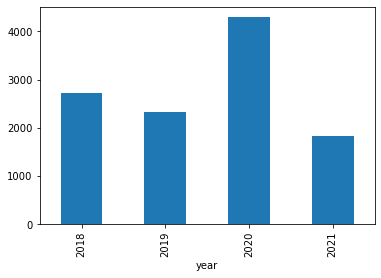

In [169]:
grouped_df.plot(kind='bar',x='year')

In [170]:
artist_df = artist_df.loc[artist_df['popularity'] >= 25]

In [172]:
year2021_df = artist_df.loc[artist_df['year'] == 2021]
year2021_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.000000,222.0
mean,0.424515,0.584554,215850.909910,0.557459,0.216216,0.136765,5.378378,0.170541,-8.498464,0.779279,55.599099,0.081792,126.222117,0.472966,2021.0
std,0.338003,0.161176,113967.051401,0.232009,0.412594,0.311163,3.523814,0.121297,4.974249,0.415670,16.618602,0.109663,32.156319,0.243637,0.0
min,0.001510,0.190000,37107.000000,0.016300,0.000000,0.000000,0.000000,0.046300,-28.235000,0.000000,26.000000,0.024800,69.877000,0.032000,2021.0
25%,0.114750,0.500000,164733.000000,0.403750,0.000000,0.000000,2.000000,0.093800,-11.700500,1.000000,39.250000,0.033300,96.955500,0.273250,2021.0
50%,0.332000,0.590000,188180.000000,0.600500,0.000000,0.000002,6.000000,0.125000,-6.250000,1.000000,56.000000,0.041400,126.009500,0.437500,2021.0
75%,0.727500,0.689750,224547.000000,0.734250,0.000000,0.002340,8.000000,0.187750,-5.056250,1.000000,70.000000,0.083675,147.828250,0.669000,2021.0
max,0.981000,0.964000,783960.000000,0.966000,1.000000,0.953000,11.000000,0.659000,-3.226000,1.000000,100.000000,0.899000,205.967000,0.963000,2021.0


In [173]:
year2020_df = artist_df.loc[artist_df['year'] == 2020]
year2020_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.000000,1297.0
mean,0.207992,0.647532,179007.188897,0.651477,0.437934,0.088244,5.327679,0.211790,-7.176611,0.579800,65.949113,0.131686,123.173965,0.482309,2020.0
std,0.261416,0.169209,78505.633269,0.187868,0.496324,0.243449,3.570254,0.164466,3.154489,0.493781,18.983274,0.118883,28.108868,0.233098,0.0
min,0.000002,0.000000,31250.000000,0.012000,0.000000,0.000000,0.000000,0.020200,-34.256000,0.000000,25.000000,0.000000,0.000000,0.000000,2020.0
25%,0.014500,0.537000,148707.000000,0.535000,0.000000,0.000000,2.000000,0.102000,-8.259000,0.000000,66.000000,0.045200,99.908000,0.305000,2020.0
50%,0.096700,0.661000,183520.000000,0.657000,0.000000,0.000000,6.000000,0.138000,-6.695000,1.000000,73.000000,0.075600,127.709000,0.482000,2020.0
75%,0.294000,0.773000,213493.000000,0.787000,1.000000,0.000348,8.000000,0.289000,-5.183000,1.000000,78.000000,0.192000,140.433000,0.667000,2020.0
max,0.996000,0.980000,842311.000000,1.000000,1.000000,0.990000,11.000000,0.970000,0.977000,1.000000,96.000000,0.777000,211.749000,0.978000,2020.0


In [174]:
year2019_df = artist_df.loc[artist_df['year'] == 2019]
year2019_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.000000,1007.0
mean,0.250392,0.645446,201010.560079,0.606135,0.411122,0.052239,5.143992,0.190116,-7.334297,0.606753,67.316783,0.121060,121.612513,0.478382,2019.0
std,0.263126,0.172585,71139.292445,0.194290,0.492282,0.183140,3.597564,0.170054,4.031761,0.488714,14.127999,0.124776,30.158239,0.231591,0.0
min,0.000001,0.000000,34573.000000,0.000261,0.000000,0.000000,0.000000,0.024600,-38.619000,0.000000,25.000000,0.000000,0.000000,0.000000,2019.0
25%,0.040400,0.538500,167717.500000,0.489500,0.000000,0.000000,2.000000,0.099550,-8.434500,0.000000,66.000000,0.041050,97.954500,0.300500,2019.0
50%,0.150000,0.669000,193027.000000,0.623000,0.000000,0.000000,5.000000,0.123000,-6.371000,1.000000,70.000000,0.064500,120.088000,0.469000,2019.0
75%,0.377500,0.770000,222992.000000,0.742000,1.000000,0.000191,8.000000,0.207500,-4.928000,1.000000,75.000000,0.153500,143.937500,0.651000,2019.0
max,0.990000,0.975000,732554.000000,1.000000,1.000000,0.983000,11.000000,0.982000,0.457000,1.000000,91.000000,0.868000,210.164000,0.977000,2019.0


In [175]:
year2018_df = artist_df.loc[artist_df['year'] == 2018]
year2018_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.000000,1058.0
mean,0.280368,0.664192,203521.451796,0.589863,0.465974,0.032089,5.227788,0.175577,-7.313548,0.614367,66.074669,0.123012,122.483936,0.459663,2018.0
std,0.280089,0.154347,49056.617649,0.185651,0.499077,0.142643,3.569569,0.139384,3.502546,0.486975,12.566986,0.118406,29.877539,0.230342,0.0
min,0.000077,0.000000,37640.000000,0.001480,0.000000,0.000000,0.000000,0.022800,-31.839000,0.000000,25.000000,0.000000,0.000000,0.000000,2018.0
25%,0.048775,0.570500,176210.500000,0.471500,0.000000,0.000000,2.000000,0.098925,-8.559000,0.000000,64.000000,0.040025,98.042000,0.274500,2018.0
50%,0.176000,0.677500,203005.500000,0.598500,0.000000,0.000000,5.000000,0.120000,-6.586500,1.000000,68.000000,0.066450,121.510000,0.448000,2018.0
75%,0.434000,0.771500,227013.500000,0.722250,1.000000,0.000193,8.000000,0.195000,-5.165000,1.000000,73.000000,0.169750,144.004000,0.626750,2018.0
max,0.992000,0.968000,667320.000000,0.996000,1.000000,1.000000,11.000000,0.968000,0.175000,1.000000,91.000000,0.649000,220.099000,0.981000,2018.0


In [176]:
year2017_df = artist_df.loc[artist_df['year'] == 2017]
year2017_df.describe()

,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,popularity,speechiness,tempo,valence,year
count,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.0
mean,0.274761,0.618280,211078.008511,0.599751,0.372340,0.085366,5.164894,0.190320,-8.073463,0.626596,67.189362,0.111586,116.650901,0.419957,2017.0
std,0.284152,0.183493,55395.391657,0.209055,0.483686,0.247249,3.628875,0.158216,5.190098,0.483966,8.650737,0.110894,31.597616,0.234438,0.0
min,0.000002,0.000000,40000.000000,0.000020,0.000000,0.000000,0.000000,0.021500,-54.376000,0.000000,25.000000,0.000000,0.000000,0.000000,2017.0
25%,0.044150,0.529750,181534.750000,0.464500,0.000000,0.000000,1.000000,0.098800,-9.018750,0.000000,63.000000,0.039200,93.763750,0.235750,2017.0
50%,0.163500,0.640000,209360.000000,0.618500,0.000000,0.000001,5.000000,0.122500,-6.750000,1.000000,67.000000,0.063150,116.032000,0.406000,2017.0
75%,0.440000,0.746250,235066.500000,0.750250,1.000000,0.000666,8.000000,0.238500,-5.204250,1.000000,72.000000,0.133250,139.072250,0.582250,2017.0
max,0.996000,0.965000,598787.000000,1.000000,1.000000,1.000000,11.000000,0.960000,-0.804000,1.000000,87.000000,0.649000,203.908000,0.969000,2017.0


In [177]:
combined_df = pd.DataFrame({
    'Year 2021':year2021_df.describe().transpose()['mean'],
    'Year 2020':year2020_df.describe().transpose()['mean'],
    'Year 2019':year2019_df.describe().transpose()['mean'],
    'Year 2018':year2018_df.describe().transpose()['mean'],
    'Year 2017':year2017_df.describe().transpose()['mean']
})

In [178]:
combined_df

,Year 2021,Year 2020,Year 2019,Year 2018,Year 2017
acousticness,0.424515,0.207992,0.250392,0.280368,0.274761
danceability,0.584554,0.647532,0.645446,0.664192,0.618280
duration_ms,215850.909910,179007.188897,201010.560079,203521.451796,211078.008511
energy,0.557459,0.651477,0.606135,0.589863,0.599751
explicit,0.216216,0.437934,0.411122,0.465974,0.372340
instrumentalness,0.136765,0.088244,0.052239,0.032089,0.085366
key,5.378378,5.327679,5.143992,5.227788,5.164894
liveness,0.170541,0.211790,0.190116,0.175577,0.190320
loudness,-8.498464,-7.176611,-7.334297,-7.313548,-8.073463
mode,0.779279,0.579800,0.606753,0.614367,0.626596


In [180]:
combined_df_2 = pd.DataFrame({
    'Year 2021 Acousticness':year2021_df.describe()['acousticness'],
    'Year 2020 Acousticness':year2020_df.describe()['acousticness'],
    'Year 2019 Acousticness':year2019_df.describe()['acousticness']
})

In [184]:
transposed_df_2 = combined_df_2.transpose()

In [185]:
transposed_df_3 = transposed_df_2.drop(columns=['count','std','min','25%','50%','75%','max'])

<AxesSubplot:>

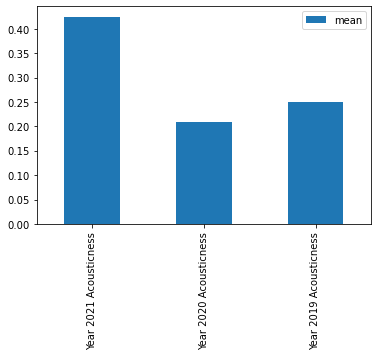

In [186]:
transposed_df_3.plot(kind='bar')

In [ ]:
# year2001to2002_df =  artist_df.loc[(artist_df['year'] >=2001) &(artist_df['year'] <=2002)]
# year1933to1939_df = artist_df.loc[(artist_df['year'] >=1933) &(artist_df['year'] <=1939)]
# years1942to1945_df =artist_df.loc[(artist_df['year'] >=1942) &(artist_df['year'] <=1945)]
# years2007to2008_df = artist_df.loc[(artist_df['year'] >=2007) &(artist_df['year'] <=2008)]
# years1990to1992_df = artist_df.loc[(artist_df['year'] >=1990) &(artist_df['year'] <=1992)]